In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set path to root directory
path = Path('/content/drive/My Drive/datanew')


In [ ]:
path.ls()

[PosixPath('/content/drive/My Drive/datanew/.DS_Store'),
 PosixPath('/content/drive/My Drive/datanew/test'),
 PosixPath('/content/drive/My Drive/datanew/train'),
 PosixPath('/content/drive/My Drive/datanew/valid')]

In [ ]:
np.random.seed(2)

In [ ]:
data = ImageDataBunch.from_folder(path, train='train',test = 'test', valid='valid',ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
normal, covid
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


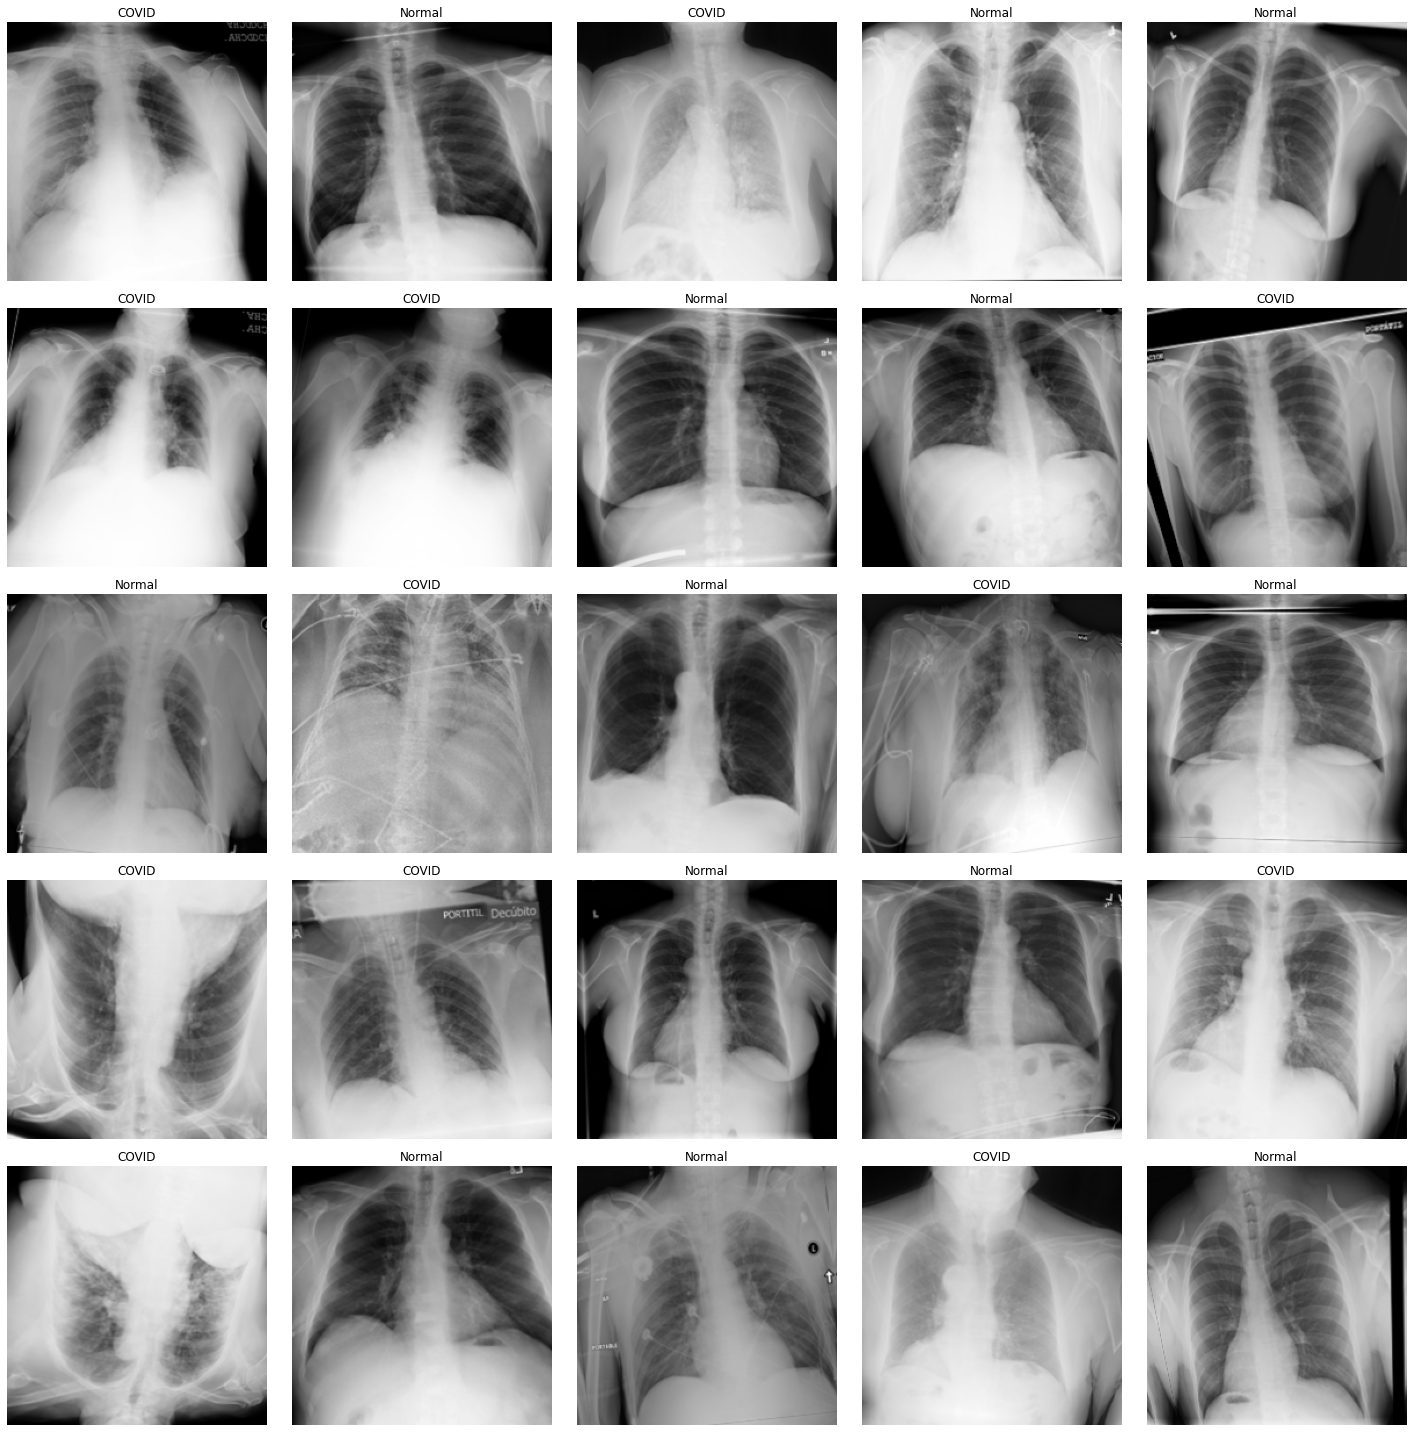

In [ ]:
data.show_batch()

In [ ]:
print(data.classes)
len(data.classes),data.c

['COVID', 'Normal']


(2, 2)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fit_one_cycle(4)